In [2]:
# Cross validation

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

(150, 4)


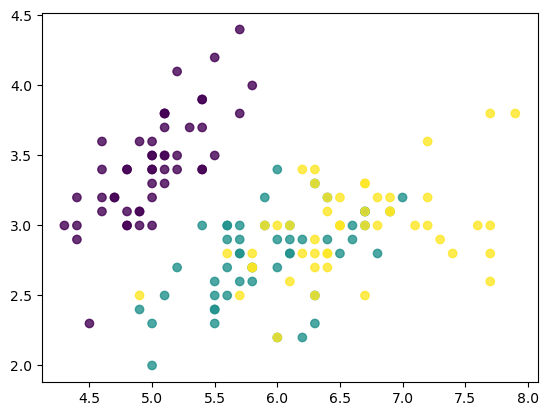

In [4]:
iris = load_iris()

X = iris.data
y = iris.target

print(X.shape)

plt.scatter(X[:, 0], X[:, 1], c=y, alpha=0.8)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state= 5)
print(X_train.shape)
print(X_test.shape)

(120, 4)
(30, 4)


Text(0.5, 1.0, 'Test set')

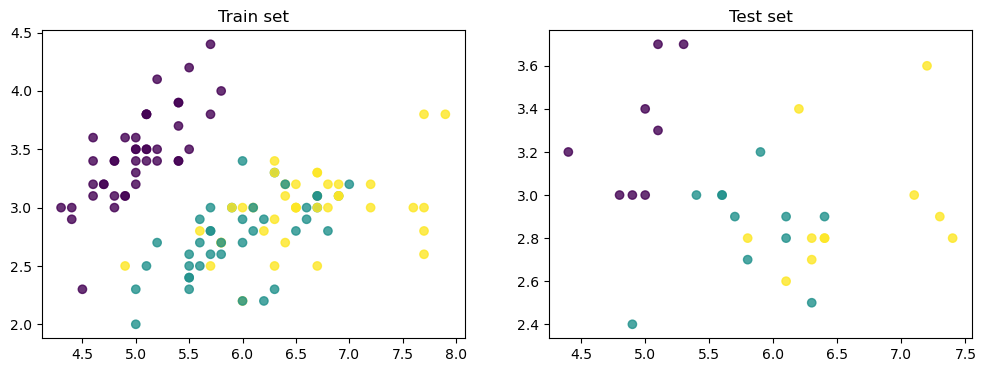

In [7]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.title("Train set")
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)
plt.title("Test set")

In [8]:
from sklearn.neighbors import KNeighborsClassifier

In [9]:
model = KNeighborsClassifier(n_neighbors=6)

model.fit(X_train, y_train)
model.score(X_test, y_test)

0.9666666666666667

In [10]:
from sklearn.model_selection import cross_val_score

In [11]:
cross_val_score(KNeighborsClassifier(4), X_train, y_train, cv=5, scoring='accuracy').mean()

0.9666666666666668

c:\Users\bilal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "c:\Users\bilal\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "c:\Users\bilal\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "c:\Users\bilal\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "c:\Users\bilal\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

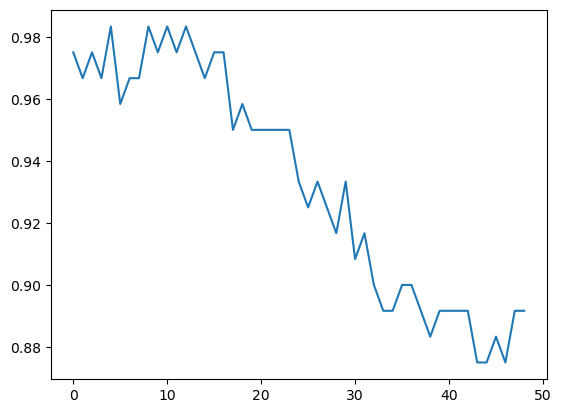

In [12]:
val_score = []
for k in range(1, 50):
    score = cross_val_score(KNeighborsClassifier(k), X_train, y_train, cv=5).mean()
    val_score.append(score)

plt.plot(val_score)

In [13]:
from sklearn.model_selection import validation_curve

In [14]:
from sklearn.model_selection import validation_curve
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

# Définir le modèle
model = KNeighborsClassifier()

# Plage des valeurs pour 'n_neighbors'
k = np.arange(1, 50)

# Validation Curve
try:
    train_score, val_score = validation_curve(
        estimator=model,
        X=X_train,
        y=y_train,
        param_name='n_neighbors',
        param_range=k,
        cv=5
    )
    print("Validation Curve Calculée avec succès !")
except Exception as e:
    print("Erreur :", e)


Validation Curve Calculée avec succès !


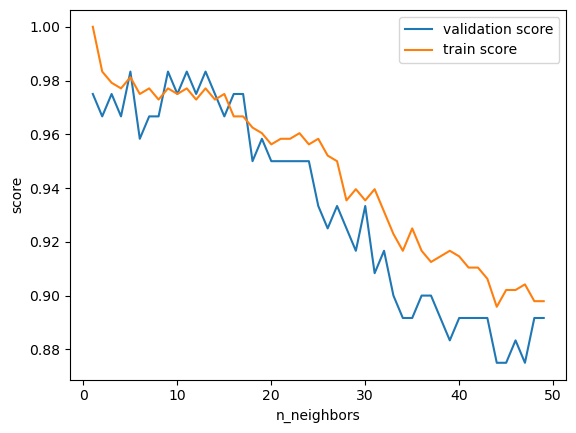

In [15]:
plt.plot(k, val_score.mean(axis=1), label='validation score')
plt.plot(k, train_score.mean(axis=1), label='train score')

plt.xlabel('n_neighbors')
plt.ylabel('score')
plt.legend()

In [16]:
from sklearn.model_selection import GridSearchCV

In [17]:
param_grid = {'n_neighbors': np.arange(1, 20), 'metric':['euclidean', 'manhattan']}

grid = GridSearchCV(KNeighborsClassifier(), param_grid, cv=5)

grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])})

In [18]:
grid.best_score_

0.9833333333333334

In [19]:
grid.best_params_

{'metric': 'euclidean', 'n_neighbors': 5}

In [20]:
model = grid.best_estimator_

In [21]:
model.score(X_test, y_test)

0.9333333333333333

In [22]:
from sklearn.metrics import confusion_matrix

In [23]:
confusion_matrix(y_test, model.predict(X_test))

array([[ 8,  0,  0],
       [ 0,  9,  2],
       [ 0,  0, 11]], dtype=int64)

In [24]:
from sklearn.model_selection import learning_curve

In [25]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

[ 9 19 28 38 48 57 67 76 86 96]


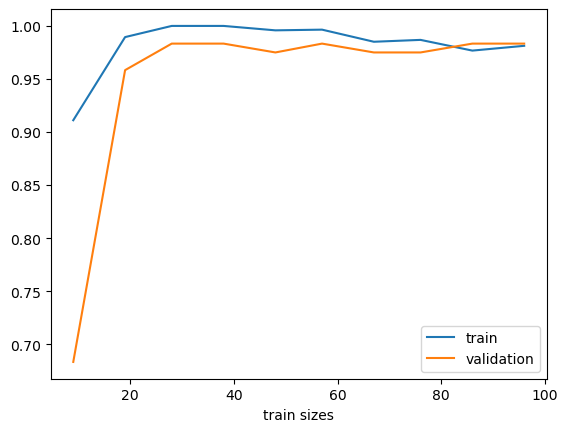

In [26]:
print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train sizes')
plt.legend()

In [27]:
from sklearn.model_selection import learning_curve

In [30]:
N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)